<h1 style="text-align: center;">[Daegu Apartement Predict Price]</h1>
<h3 style="text-align: center;">[Rachmawati Hapsari Putri]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**<br>

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**1.2 Problem Statements**

**How to predict apartment sale prices to guide property investments and optimize real estate development strategies?**  


**1.3 Goals**

To develop a model that predicts apartment sale prices by analyzing key factors such as size, year built, number of facilities, and nearby amenities. These predictions will help sellers set competitive and accurate prices, highlight valuable property features to attract buyers, and reduce the time properties stay on the market, ensuring maximum profit through informed, data-driven decisions.

**1.4 Analytical Approach**

To address the problem, we will analyze the data to uncover patterns in the features that distinguish one apartment from another. By identifying the relationships between these features and the apartment prices, we aim to gain valuable insights into the key drivers of pricing.

Next, we will build a regression model to predict apartment prices. This predictive tool will assist sellers in setting competitive and market-aligned prices for their properties. It will also enable better decision-making by providing a clear understanding of the factors influencing apartment prices, ensuring sellers maximize revenue while attracting buyers.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**Business Metric**

- **Property Sale Revenue**:<br>
    Measures the total revenue generated from the sale of properties, which is the primary goal of the model. Accurate predictions of property prices directly contribute to maximizing revenue for sellers.


**Machine Learning Evaluation Metrics**

- **Mean Absolute Error (MAE)**:  
  MAE calculates the average of the absolute differences between the predicted and actual prices. It helps to understand the typical error size in predicting property prices. A lower MAE means the model's predictions are closer to the actual prices.

- **Root Mean Squared Error (RMSE)**:  
  RMSE gives more weight to larger errors than MAE, making it useful for identifying cases where the model's predictions are far off. It provides an overall measure of how spread out or varied the errors are. A smaller RMSE suggests more accurate predictions.

- **Mean Absolute Percentage Error (MAPE)**:  
  MAPE measures the average percentage difference between the predicted and actual prices. This is helpful for understanding the error relative to the actual price, and it makes it easier to compare accuracy across different price ranges. A lower MAPE indicates better prediction accuracy, especially for relative price accuracy.

- **R² (R-squared, Coefficient of Determination)**:  
  R² shows how well the model’s features (such as apartment size, location, and amenities) explain the variation in the target variable (property sale price). A higher R² means the model does a good job of capturing the factors that affect the sale price, making its predictions more reliable.

**1.6 Success Criteria**

- Achieve MAE and RMSE values that are sufficiently low compared to the average apartment price range.
- Obtain a MAPE of less than 5-10% to ensure consistent relative accuracy across varying price levels.
- Obtain an R² value of at least 0.8, meaning the model explains 80% or more of the variance in apartment prices.

## **Section 2. Data Understanding**

**2.1 General Information**

| Name | Description |
| ------------------ |------------------- |
Hallway Type| Apartment type
TimeToSubway| Time needed to the nearest subway station
SubwayStation| The name of the nearest subway station
N_FacilitiesNearBy(ETC)| The number of facilities nearby
N_FacilitiesNearBy(PublicOffice)| The number of public office facilities nearby
N_SchoolNearBy(University)| The number of universities nearby
N_Parkinglot(Basement)| The number of the parking lot
YearBuilt| The year the apartment was built
N_FacilitiesInApt| Number of facilities in the apartment
Size(sqft)| The apartment size (in square feet)
SalePrice| The apartment price (Won)

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
Hallway Type| Different apartment types often appeal to different buyers based on lifestyle, family size, or cultural preferences
TimeToSubway| Proximity to public transportation is a critical factor influencing convenience, demand, and value.
SubwayStation| The reputation and connectivity of a subway station (e.g., central, busy, or well-connected stations) can affect apartment desirability.
N_FacilitiesNearBy(ETC)| The availability of general facilities such as shops, restaurants, or parks enhances livability and demand.
N_FacilitiesNearBy(PublicOffice)| Proximity to government or administrative facilities improves convenience for residents who frequently access these services.
N_SchoolNearBy(University)| Proximity to universities increases demand from students, faculty, and investors looking for rental income
N_Parkinglot(Basement)| Adequate parking facilities significantly impact the convenience for car owners, particularly in urban areas where parking is limited.
YearBuilt| Newer apartments often have modern features and infrastructure, while older ones may need renovations, impacting desirability and pricing.
N_FacilitiesInApt| Facilities within the apartment complex (e.g., gyms, pools, security) increase convenience, lifestyle value, and overall attractiveness.
Size(sqft)| Apartment size is a fundamental factor influencing price. Larger apartments typically command higher values.

### Importing libraries & packages

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold

**Import Dataset**

In [91]:
df = pd.read_csv('data_daegu_apartment.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**2.3 Statistics Summary**

In [93]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [94]:
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [95]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

dgu = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [96]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

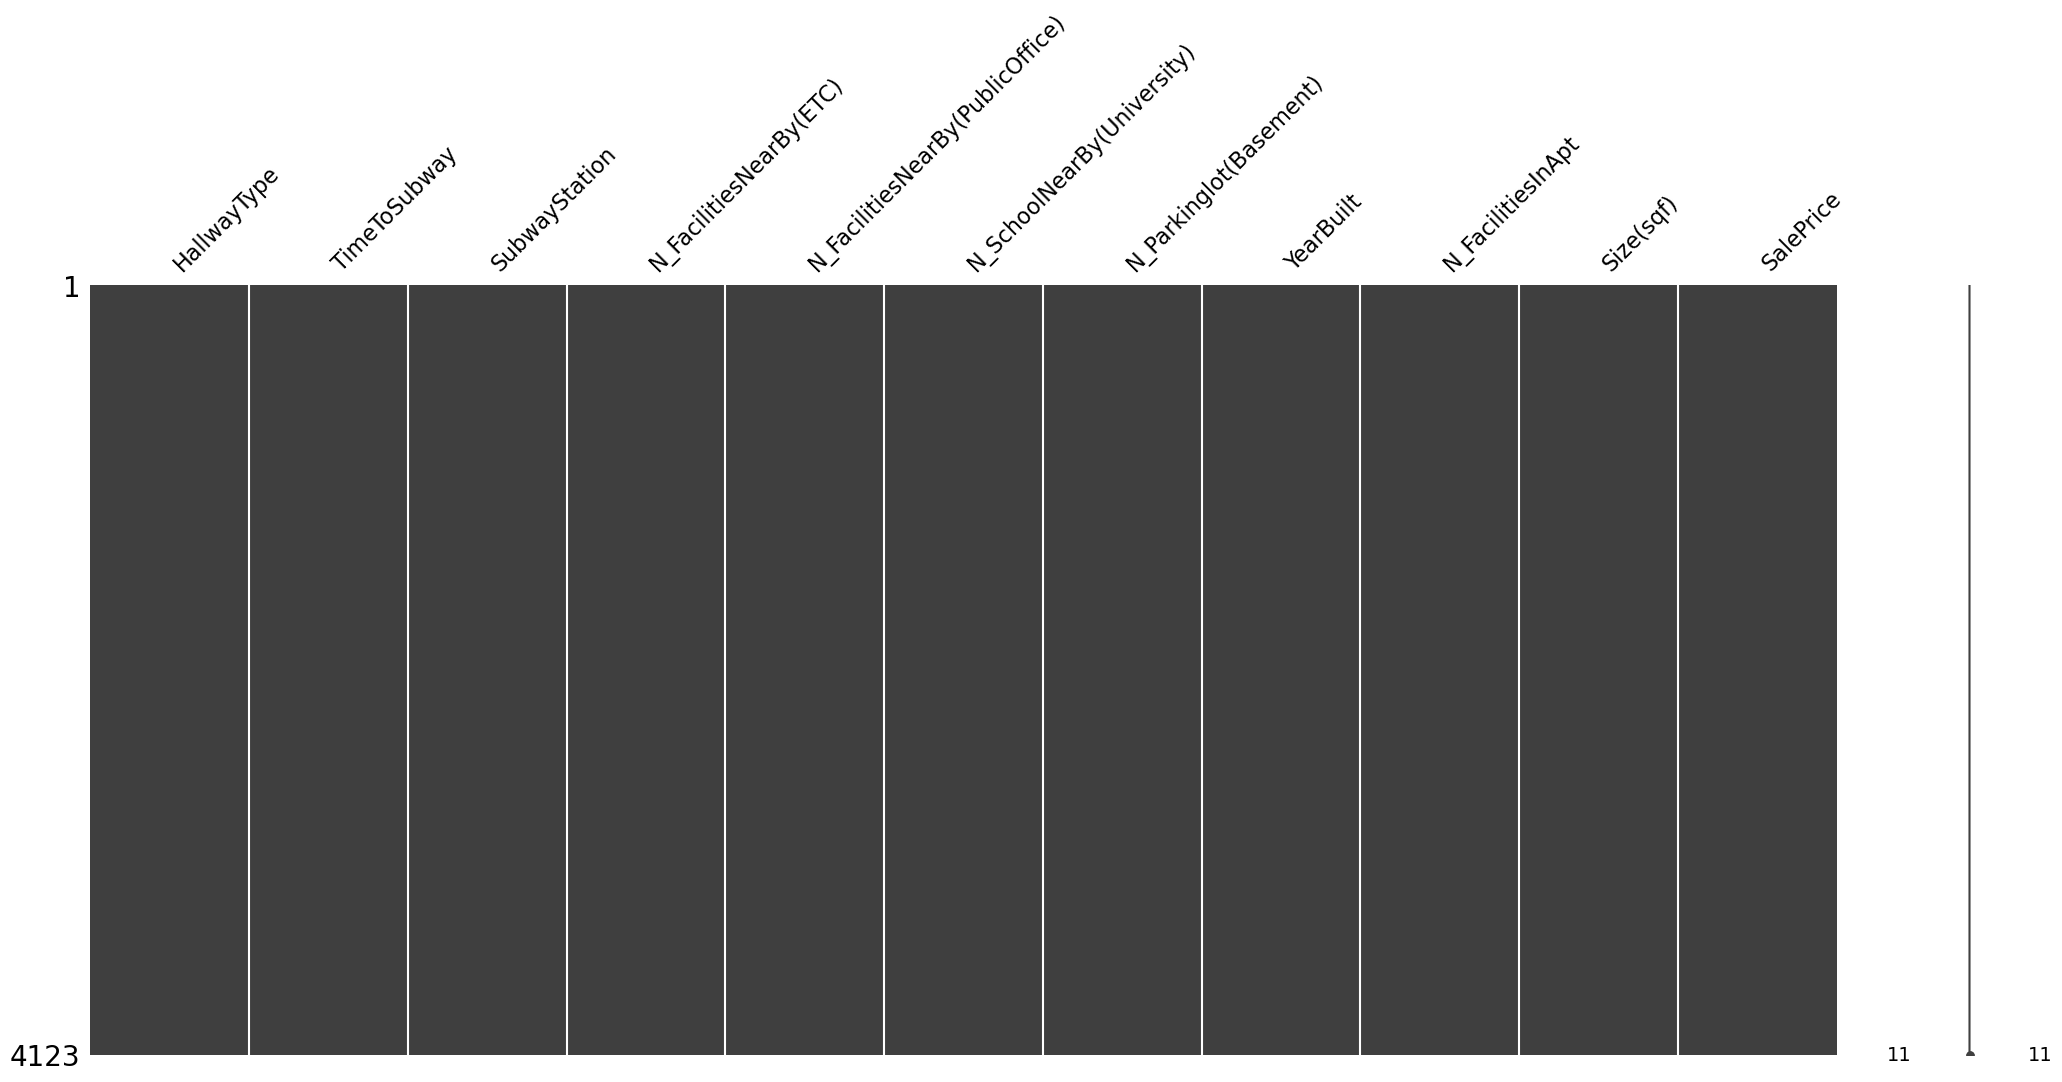

In [97]:
import missingno
missingno.matrix(df)

In [98]:
print(f'{(df.isnull().sum() / len(df)) * 100}')

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64


There is no Missing Values in this dataset

**3.2 Duplicated Values**

In [99]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Unexpectedly, there is 1422 row of data duplicate in this dataset

In [100]:
df[(df['Size(sqf)'] == 910) & (df['SalePrice'] == 263345)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


To make sure the data duplicate, i try to see the size and price of one data, and turns out there is 6 duplicate of this data, so we need to remove it because the machine learning model is senistive with duplicate data. 

In [101]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [102]:
df.shape

(2701, 11)

In [103]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


**3.3 Identify Spelling Errors**

In [104]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total Category on '{col}': {df[col].nunique()}")

Total Category on 'HallwayType': 3
Total Category on 'TimeToSubway': 5
Total Category on 'SubwayStation': 8


In [105]:
for column in categoric_features.columns:
    print(f"Unique values in {column}:")
    print(categoric_features[column].unique())
    print("-" * 50)


Unique values in HallwayType:
['terraced' 'mixed' 'corridor']
--------------------------------------------------
Unique values in TimeToSubway:
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
--------------------------------------------------
Unique values in SubwayStation:
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
--------------------------------------------------


No Spelling error in this dataset

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
numeric_features = df.select_dtypes(include='number')

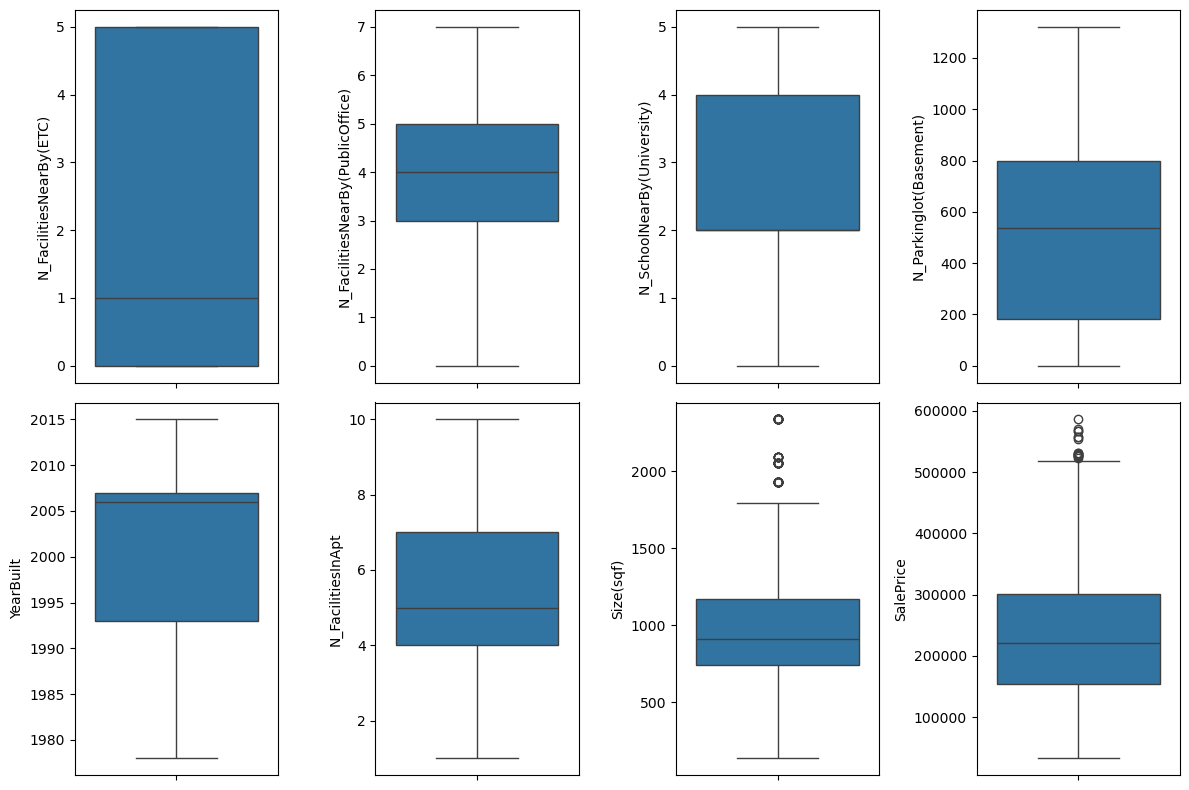

In [108]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is no anomaly in the categoric feature, but there is outlier in Size and Price Column

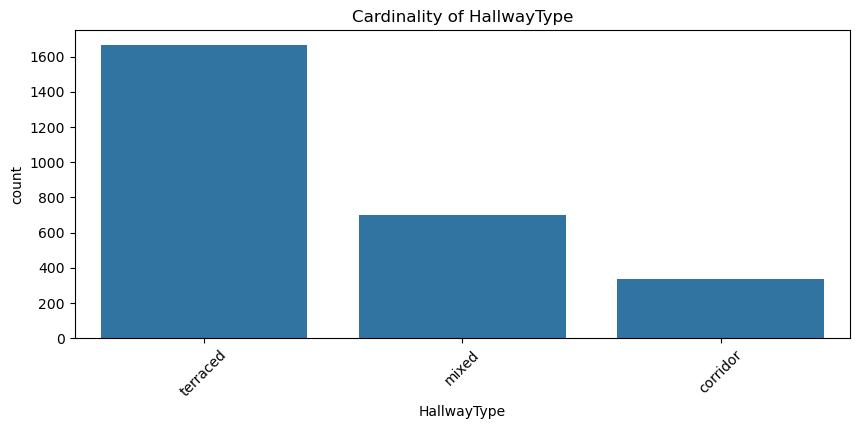

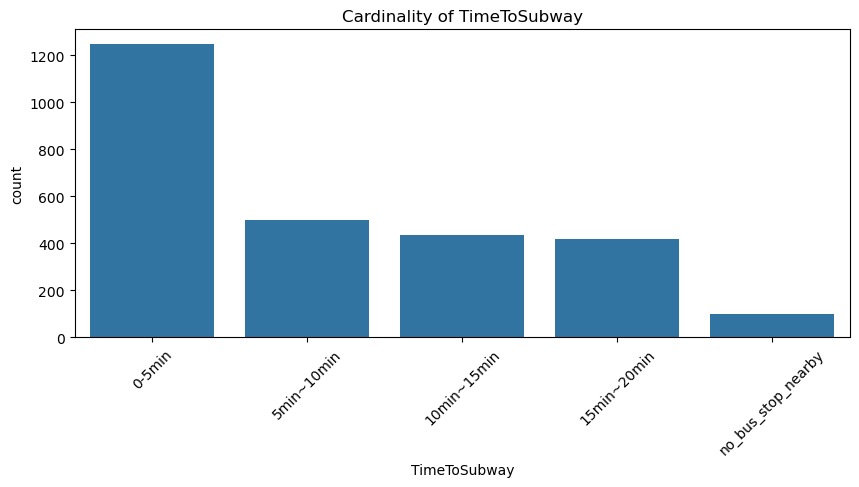

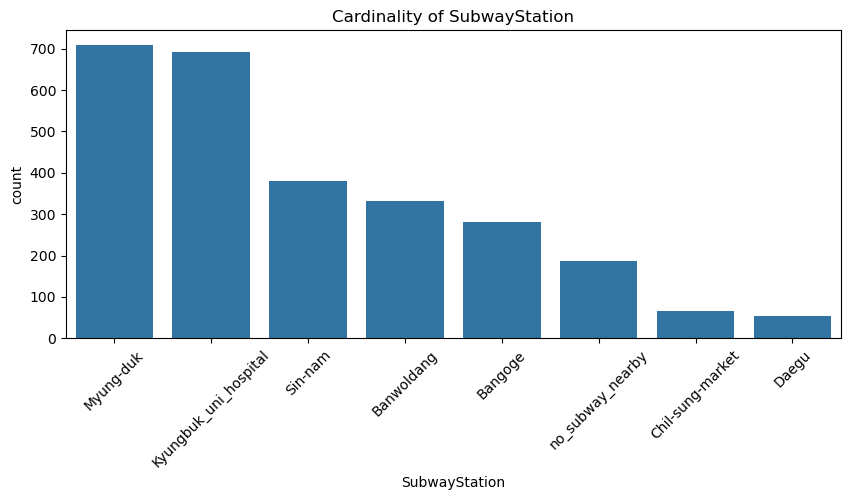

In [109]:
for col in categoric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Cardinality of {col}")
    plt.xticks(rotation=45)
    plt.show()

For categoric features, there is no anomaly data.

**3.5 Identify Outlier Values**

In [110]:
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower: {lower_limit}')
    print(f'upper: {upper_limit}') 
    
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [111]:
find_outlier(df['SalePrice'])

IQR: 147345.0
lower: -67478.5
upper: 521901.5
Number of outliers: 17
Percentage of outliers: 0.63%


In [112]:
find_outlier(df['Size(sqf)'])

IQR: 424.0
lower: 107.0
upper: 1803.0
Number of outliers: 84
Percentage of outliers: 3.11%


In [113]:
df.drop(df[df['SalePrice'] > 521901.5].index, inplace=True)

In [114]:
df.drop(df[df['Size(sqf)'] > 1803.0].index, inplace=True)

In [115]:
(df['SalePrice'] > 521901.5).sum()

0

In [116]:
df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)']

0

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return pd.DataFrame(dict(feature=X.columns, VIF=vif_values))

In [167]:
vif_result = vif(numeric_features.drop('SalePrice', axis=1))
vif_result

,feature,VIF
0,N_FacilitiesNearBy(ETC),5.975305
1,N_FacilitiesNearBy(PublicOffice),13.896514
2,N_SchoolNearBy(University),16.257819
3,N_Parkinglot(Basement),11.266549
4,YearBuilt,30.259604
5,N_FacilitiesInApt,26.112948
6,Size(sqf),8.666827


In [168]:
n_mul = vif_result[vif_result['VIF'] > 10]
print(f"There are {len(n_mul)} of {len(vif_result)} features identified as having multicollinearity problems")

There are 5 of 7 features identified as having multicollinearity problems


In this analysis, multicollinearity is present among variables such as YearBuilt, N_FacilitiesInApt, and others, as indicated by their high VIF values. While multicollinearity can complicate the interpretation of coefficients in linear models, it does not inherently affect the predictive power of advanced machine learning models, such as Random Forest, XGBoost, and AdaBoost. These models are designed to handle correlated features effectively without requiring their removal. 

Additionally, each variable provides valuable information about apartment characteristics, such as size, amenities, and age, which are all crucial factors in determining selling prices in the real estate market of Daegu. Removing these variables could result in a loss of critical insights that align with the business context. 

Therefore, considering the objective of this analysis is predictive modeling rather than strict interpretability, and the robustness of the chosen machine learning models against multicollinearity, I have chosen to retain all variables. This approach ensures the model captures the full range of influential factors affecting apartment prices while leveraging the strengths of models like XGBoost to handle multicollinearity effectively.

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [119]:
train, test = train_test_split(df_seen, test_size=0.2, random_state=42)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Distribution**

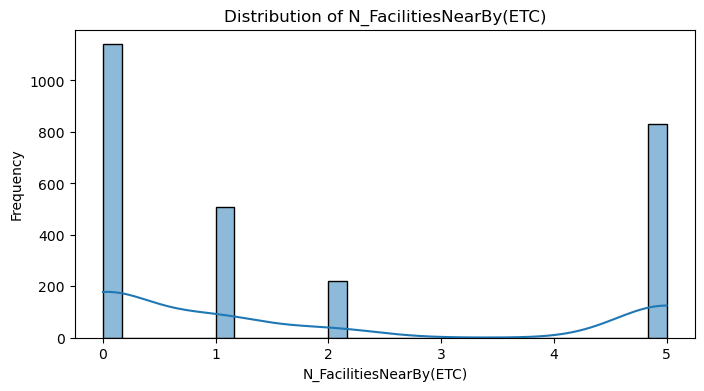

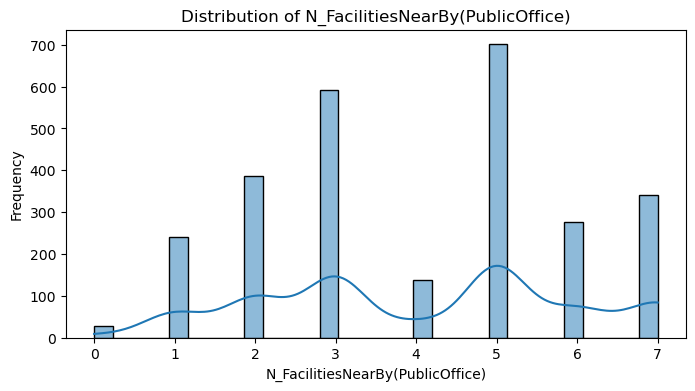

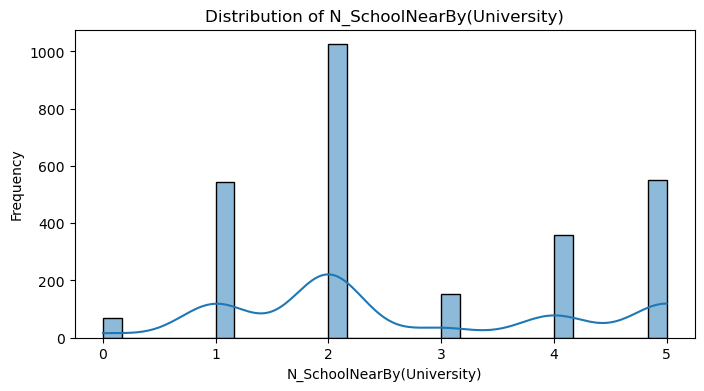

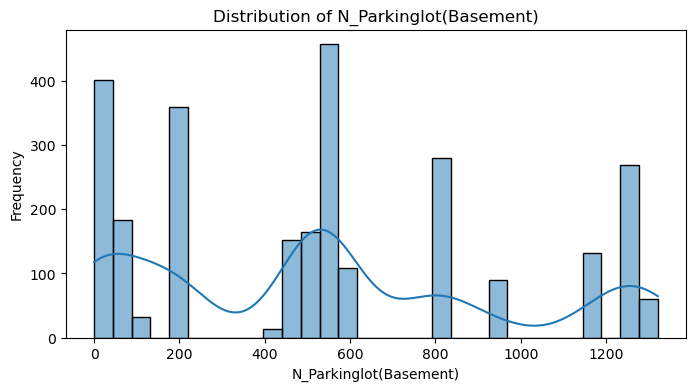

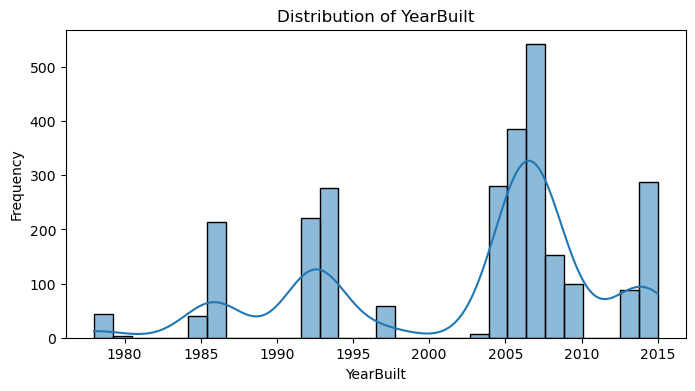

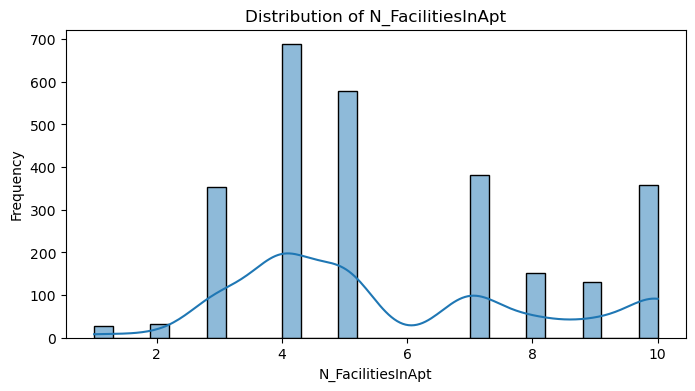

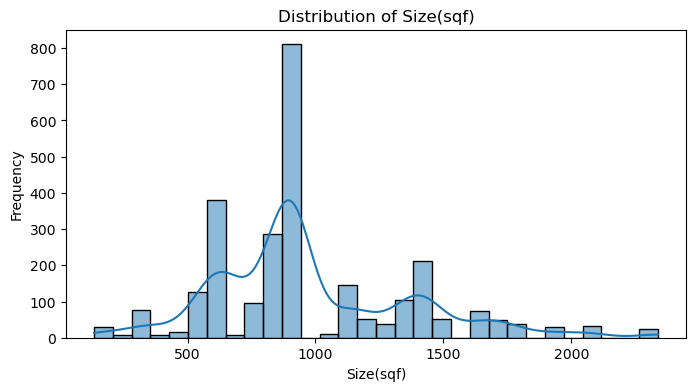

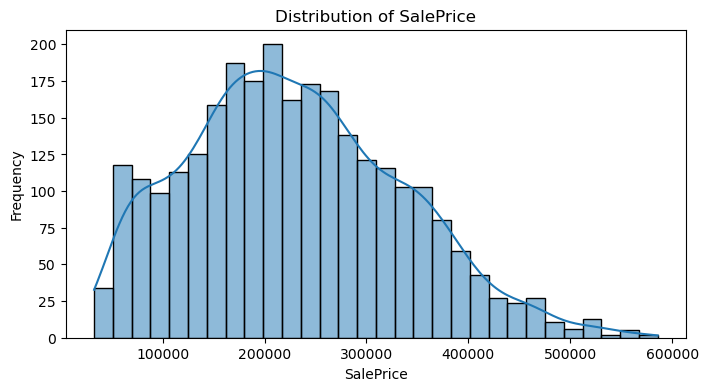

In [120]:
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [121]:
print(f"Total Apartement in Nearest Subway Station:\n{df['SubwayStation'].value_counts()}")
print(f"\nType of Hallway Apartment:\n{df['HallwayType'].value_counts()}")

Total Apartement in Nearest Subway Station:
SubwayStation
Myung-duk                685
Kyungbuk_uni_hospital    649
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

Type of Hallway Apartment:
HallwayType
terraced    1601
mixed        674
corridor     336
Name: count, dtype: int64


In [122]:
subway_type = (df.groupby(['SubwayStation', 'HallwayType'])['HallwayType']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
subway_time = (
    df.groupby(['SubwayStation', 'TimeToSubway'])['TimeToSubway']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

In [123]:
subway_time

,SubwayStation,TimeToSubway,Count
5,Kyungbuk_uni_hospital,0-5min,367
9,Myung-duk,15min~20min,329
10,Sin-nam,0-5min,310
1,Banwoldang,0-5min,301
6,Kyungbuk_uni_hospital,10min~15min,282
0,Bangoge,5min~10min,280
7,Myung-duk,0-5min,212
8,Myung-duk,10min~15min,144
13,no_subway_nearby,no_bus_stop_nearby,100
12,no_subway_nearby,5min~10min,88


In [124]:
subway_type

,SubwayStation,HallwayType,Count
7,Kyungbuk_uni_hospital,terraced,605
9,Myung-duk,mixed,329
12,Sin-nam,terraced,310
2,Banwoldang,terraced,301
0,Bangoge,mixed,280
10,Myung-duk,terraced,212
14,no_subway_nearby,terraced,160
8,Myung-duk,corridor,144
3,Chil-sung-market,mixed,65
11,Sin-nam,corridor,47


In [125]:
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,295575.0
Kyungbuk_uni_hospital,245132.0
Sin-nam,242477.0
no_subway_nearby,236725.5
Bangoge,179867.0


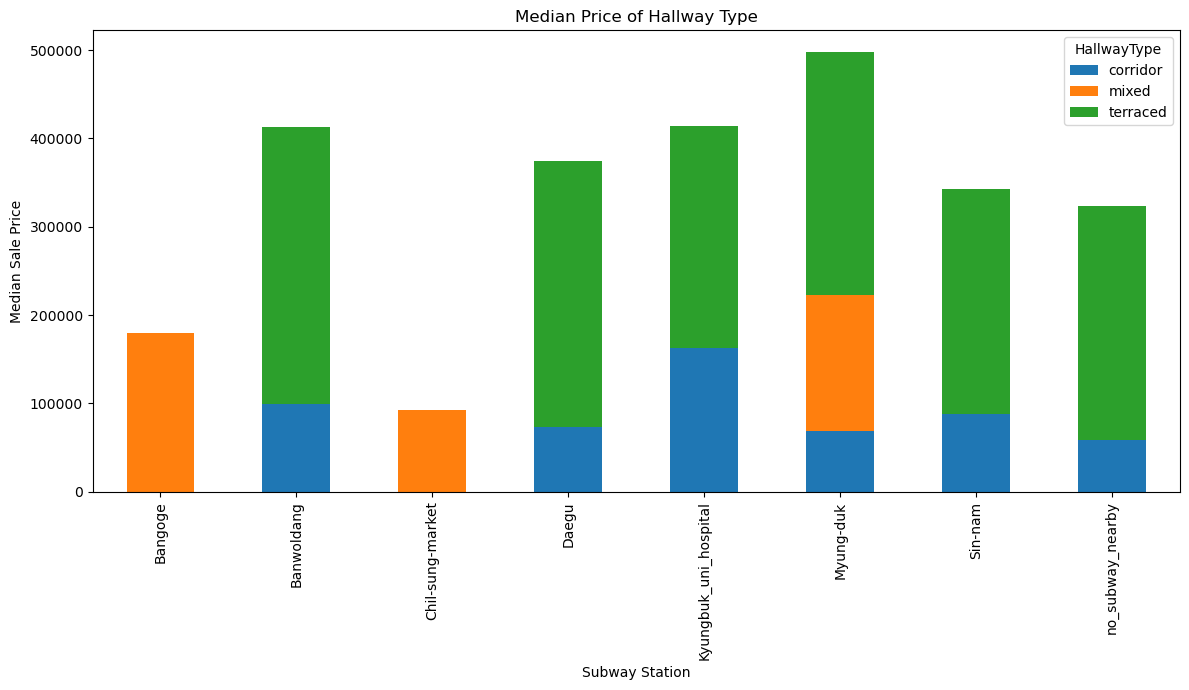

In [126]:
import matplotlib.pyplot as plt

# Create a pivot table
subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

# Plot the pivot table as a stacked bar chart
pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))

# Customize the plot
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Price of Hallway Type')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Text(0.5, 1.0, 'Hallway Type per Nearest Subway Station')

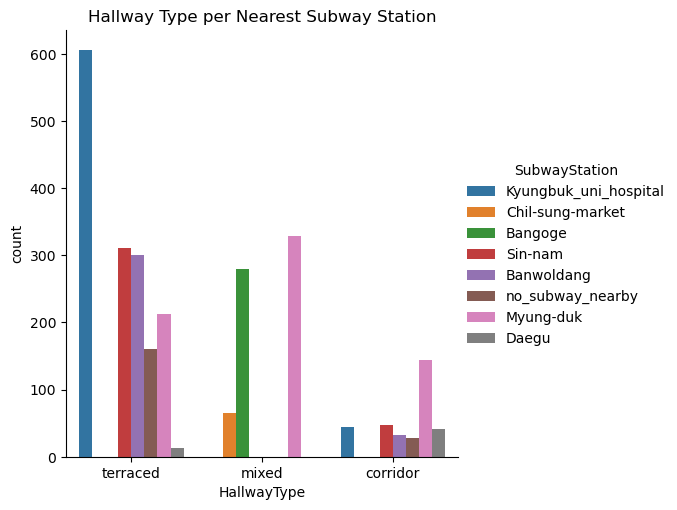

In [127]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df) 
plt.title('Hallway Type per Nearest Subway Station')

**5.2 Correlation Analysis**

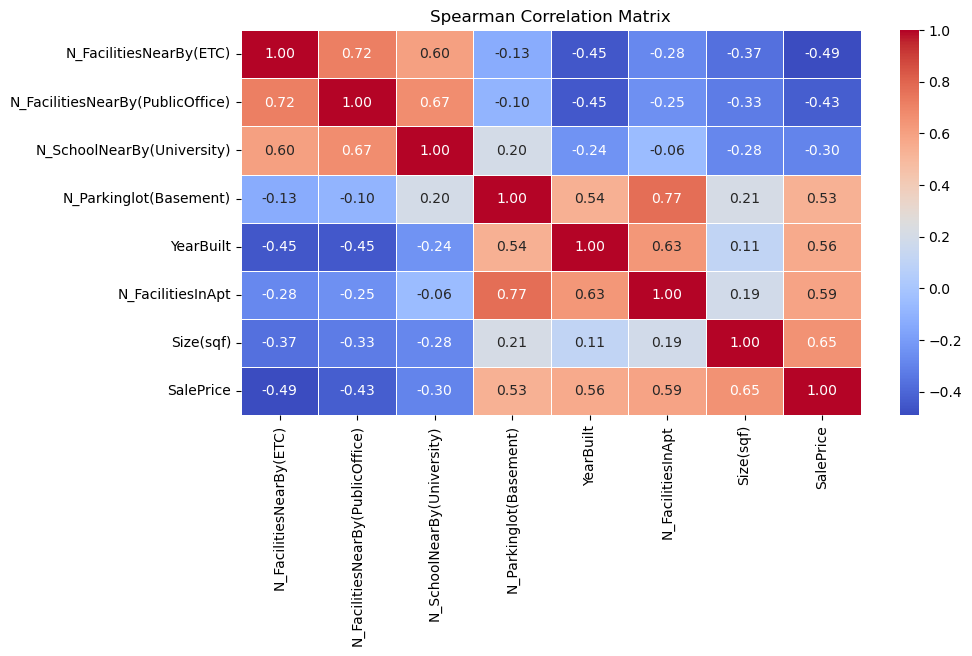

In [128]:
correlation_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

- Strong Positive Correlations:<br>
    SalePrice shows a strong positive correlation with:<br>
    - Size(sqf) (0.65): Larger apartments are associated with higher sale prices.
    - N_FacilitiesInApt (0.59): More facilities in an apartment complex increase its value.
    - YearBuilt (0.56): Newer buildings tend to have higher sale prices.
    - N_Parkinglot(Basement) and N_FacilitiesInApt (0.77): Apartments with basement parking lots tend to have more facilities.

- Negative Correlations:<br>
    SalePrice negatively correlates with:
    - N_FacilitiesNearBy(ETC) (-0.49): Apartments with many nearby facilities of type "ETC" tend to have lower sale prices.
    - N_FacilitiesNearBy(PublicOffice) (-0.43): The proximity to public offices seems to negatively influence prices.
    - YearBuilt and N_FacilitiesNearBy(ETC) (-0.45): Older apartments tend to be in areas with more general nearby facilities.

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [129]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [130]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

print(X_train.shape)
print(y_train.shape)

(1670, 10)
(1670,)


- **Features:**<br>
    - X_train = train.drop('SalePrice', axis=1) <br>
    - X_test = test.drop('SalePrice', axis=1)<br>
- **Target:**<br>
    - y_train = train['SalePrice']<br>
    - y_test = test['SalePrice']<br>


**6.2 Data Transformation (Feature Engineering)**

In [131]:
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


**6.3 Overview**

## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [158]:
import statsmodels.api as sm
feature_ols = numeric_features.drop('SalePrice', axis=1).columns
target_ols = 'SalePrice'
ols= sm.OLS(df_seen[target_ols], sm.add_constant(df_seen[feature_ols])).fit()

In [159]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     816.1
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:33:52   Log-Likelihood:                -25652.
No. Observations:                2088   AIC:                         5.132e+04
Df Residuals:                    2080   BIC:                         5.137e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### F-Test:
- **Simultaneous Test (Overall Model Significance)**:  
  The P-value of the F-statistic is 0.00, which is below the significance level of 0.05. This indicates that at least one of the predictors (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, etc.) significantly affects the apartment sale price (`SalePrice`). We have enough evidence to conclude that the overall model is statistically significant.

### Partial Test:
1. **Intercept (B0)**:  
   The P-value for B0 is below 0.05. The intercept represents the predicted sale price when all predictors are zero, which is not meaningful in the real estate context (e.g., an apartment with zero size, no facilities, etc.). However, the intercept is necessary for the mathematical formulation of the model.

2. **`N_FacilitiesNearBy(ETC) (B1)`**:  
   The P-value for B1 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby facilities (e.g., convenience stores) negatively affects the apartment price.

3. **`N_FacilitiesNearBy(PublicOffice) (B2)`**:  
   The P-value for B2 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby public offices positively affects the apartment price.

4. **`N_SchoolNearBy(University) (B3)`**:  
   The P-value for B3 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby universities negatively affects the apartment price.

5. **`N_Parkinglot(Basement) (B4)`**:  
   The P-value for B4 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in basement parking spaces positively affects the apartment price.

6. **`YearBuilt (B5)`**:  
   The P-value for B5 is below 0.05. At a 5% significance level, we have enough evidence to conclude that newer apartments (higher `YearBuilt`) positively affect the apartment price.

7. **`N_FacilitiesInApt (B6)`**:  
   The P-value for B6 is below 0.05. At a 5% significance level, we have enough evidence to conclude that more facilities within the apartment positively affect the apartment price.

8. **`Size(sqf) (B7)`**:  
   The P-value for B7 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in the size of the apartment positively affects its price.

### Parameter Estimates:
1. **Intercept (B0 = -6,272,000)**: This is not meaningful to interpret in the context of real estate, as it represents the predicted price for an apartment with all predictors set to zero.  
2. **`N_FacilitiesNearBy(ETC) (B1 = -3418.86)`**: For each additional nearby facility (e.g., convenience store), the apartment price decreases by $3,418.86, holding other variables constant.  
3. **`N_FacilitiesNearBy(PublicOffice) (B2 = 2911.38)`**: For each additional nearby public office, the apartment price increases by $2,911.38, holding other variables constant.  
4. **`N_SchoolNearBy(University) (B3 = -5816.26)`**: For each additional nearby university, the apartment price decreases by $5,816.26, holding other variables constant.  
5. **`N_Parkinglot(Basement) (B4 = 22.09)`**: For each additional basement parking space, the apartment price increases by $22.09, holding other variables constant.  
6. **`YearBuilt (B5 = 3138.18)`**: For each additional year (newer construction), the apartment price increases by $3,138.18, holding other variables constant.  
7. **`N_FacilitiesInApt (B6 = 9442.26)`**: For each additional facility within the apartment, the price increases by $9,442.26, holding other variables constant.  
8. **`Size(sqf) (B7 = 165.57)`**: For each additional square foot, the apartment price increases by $165.57, holding other variables constant.  

### Coefficient of Determination:
- **Adjusted R-Squared = 73.2%**: This model explains 73.2% of the variation in apartment prices.  
(*For example, adding variables like `N_FacilitiesInApt` improved the adjusted R-squared, indicating an enhanced model fit.*)


In [132]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)

base_model = [lr,knn,dt,rf,xgb,ada]

In [133]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

target_model = [log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]

In [134]:
base_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'Size(sqf)',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [135]:
bin_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['Size(sqf)']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [136]:
base_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'Size(sqf)',
                                  'N_Parkinglot(Basement)', 'YearBuilt'])],
                  verbose_feature_names_out=False)

In [137]:
bin_transformer.fit(X_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('Binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['Size(sqf)']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'N_Parkinglot(Basement)',
                                  'YearBuilt'])],
                  verbose_feature_names_out=False)

**7.2 Developing the Model Pipeline**

In [138]:
base_reg = Pipeline(steps=[
    ('FeatureEngineering', base_transformer),
    ('Modeling', None)
])

bin_reg = Pipeline(steps=[
    ('FeatureEngineering', bin_transformer),
    ('Modeling', None)
])

**7.3 Model Benchmarking (Comparing model base performance)**

In [139]:
list_model =[lr,knn,dt,rf,xgb,ada,log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]
list_transformer = [base_transformer, bin_transformer]
list_pipeline = [base_reg, bin_reg]

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold

# Define lists to store the results for each metric
score_rmse, score_mae, score_mape, score_r2 = [], [], [], []
mean_rmse, mean_mae, mean_mape, mean_r2 = [], [], [], []
std_rmse, std_mae, std_mape, std_r2 = [], [], [], []
best_estimators = []  # To track the best estimators (pipelines)

# Cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# List of custom labels for pipelines
pipeline_labels = ['Base Pipeline', 'Binary Pipeline']

# Model and label mapping
list_model = [lr, knn, dt, rf, xgb, ada, log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada]
model_labels = [
    'Linear Regressor', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor',
    'XGBoost Regressor', 'AdaBoost Regressor', 'Log-Transformed Linear Regressor',
    'Log-Transformed KNN Regressor', 'Log-Transformed Decision Tree Regressor',
    'Log-Transformed Random Forest Regressor', 'Log-Transformed XGBoost Regressor',
    'Log-Transformed AdaBoost Regressor'
]

# Define transformers
list_transformer = [base_transformer, bin_transformer]

# Loop through each combination of model and transformer and set pipeline parameters
for model, model_label in zip(list_model, model_labels):
    for transformer, transformer_label in zip(list_transformer, pipeline_labels):
        # Create a new pipeline with the specific transformer and model
        pipeline = Pipeline(steps=[
            ('FeatureEngineering', transformer),
            ('Modeling', model)
        ])
        
        # Perform cross-validation and track results for each model-transformer combination
        model_rmse = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
        score_rmse.append(model_rmse)
        mean_rmse.append(np.mean(model_rmse))
        std_rmse.append(np.std(model_rmse))

        # Repeat for other metrics (MAE, MAPE, R²)
        model_mae = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
        score_mae.append(model_mae)
        mean_mae.append(np.mean(model_mae))
        std_mae.append(np.std(model_mae))

        model_mape = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
        score_mape.append(model_mape)
        mean_mape.append(np.mean(model_mape))
        std_mape.append(np.std(model_mape))

        model_r2 = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='r2')
        score_r2.append(model_r2)
        mean_r2.append(np.mean(model_r2))
        std_r2.append(np.std(model_r2))

        # Append the pipeline to the list of best estimators (pipelines)
        best_estimators.append(pipeline)

# Store results in a DataFrame with custom labels
results_df = pd.DataFrame({
    'Model': [model_label for model_label in model_labels for _ in list_transformer],
    'Transformer': [transformer_label for _ in model_labels for transformer_label in pipeline_labels],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_R2': mean_r2,
    'Std_R2': std_r2
})

# Sort the results based on Mean R² score (or any other metric)
results_df_sorted = results_df.sort_values(by='Mean_R2', ascending=False)

# Display the sorted results
display(results_df_sorted)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretizat

,Model,Transformer,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
20,Log-Transformed XGBoost Regressor,Base Pipeline,-45526.460256,2264.396422,-36140.977166,1775.793433,-0.185698,0.008511,0.794400,0.010416
8,XGBoost Regressor,Base Pipeline,-45544.566350,1856.338884,-36499.017948,1565.523623,-0.192830,0.009029,0.794160,0.008376
18,Log-Transformed Random Forest Regressor,Base Pipeline,-45556.332147,2141.207755,-36147.878872,1696.248591,-0.185473,0.006510,0.794089,0.010143
4,Decision Tree Regressor,Base Pipeline,-45611.963659,2085.983537,-36527.735941,1706.654135,-0.192387,0.010761,0.793655,0.008096
16,Log-Transformed Decision Tree Regressor,Base Pipeline,-45679.756424,2489.445882,-36175.808762,1918.833508,-0.185893,0.010499,0.793069,0.011399
6,Random Forest Regressor,Base Pipeline,-45702.090853,1639.920223,-36558.108676,1443.280752,-0.193389,0.007372,0.792626,0.009138
17,Log-Transformed Decision Tree Regressor,Binary Pipeline,-46278.292116,2272.647455,-36324.437257,1713.937786,-0.186157,0.005936,0.787453,0.012362
21,Log-Transformed XGBoost Regressor,Binary Pipeline,-46299.313934,2237.909734,-36358.487168,1659.824824,-0.186678,0.005327,0.787240,0.012432
19,Log-Transformed Random Forest Regressor,Binary Pipeline,-46399.957903,2259.940134,-36414.098094,1662.642900,-0.186987,0.005242,0.786342,0.012139
9,XGBoost Regressor,Binary Pipeline,-46425.844024,1582.918498,-36928.783638,1309.197505,-0.195449,0.004031,0.785832,0.012360


In [141]:
# Identify the best estimator based on Mean R² score
best_base_index = results_df_sorted.index[0]  # Get the index of the best row (highest Mean_R2)
best_base_model = results_df_sorted.loc[best_base_index, 'Model']  # Extract the best model
best_base_score = results_df_sorted.loc[best_base_index, 'Mean_R2']  # Extract the best R² score

print(f"Best Model: {best_base_model}")
print(f"Best Mean R² Score: {best_base_score}")

Best Model: Log-Transformed XGBoost Regressor
Best Mean R² Score: 0.7944004839744988


In [142]:
# Now, we can safely access the best pipeline (estimator) by index
best_base_estimator = best_estimators[best_base_index]
best_base_estimator

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basem...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=1, ...)))])

In [143]:
print(f"Best Estimator (Pipeline): {best_base_estimator}")

Best Estimator (Pipeline): Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                     

In [144]:
# Step 1: Train the best pipeline on the full training data
best_base_estimator.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = best_base_estimator.predict(X_test)

# Step 3: Evaluate the predictions (optional)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calculate evaluation metrics for training data (on y_train)
y_train_pred = best_base_estimator.predict(X_train)

# RMSE, MAE, MAPE, R² for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)  # MAPE instead of MSE
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data (on y_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)  # MAPE instead of MSE
test_r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Training Data Performance:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"MAPE: {train_mape}")
print(f"R²: {train_r2}")

print(f"\nTest Data Performance:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"MAPE: {test_mape}")
print(f"R²: {test_r2}")

Training Data Performance:
RMSE: 42825.47216739868
MAE: 33646.265122099554
MAPE: 0.17150356239442568
R²: 0.8186119801108374

Test Data Performance:
RMSE: 46328.56118176113
MAE: 37429.41271680622
MAPE: 0.19178301387338498
R²: 0.80390051962244


**7.4 Tune Model**

In [145]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import numpy as np

# Define the hyperparameter grid for tuning AdaBoost
hyperparam = {
    "modeling__regressor__max_depth": list(np.arange(1, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.1, 1, 0.1).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 501, 10)),
    "modeling__regressor__subsample": list(np.arange(1, 11)/10),
    "modeling__regressor__gamma": list(np.arange(0, 11)),
    "modeling__regressor__colsample_bytree": list(np.arange(1, 10)/10),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 3, 7))
}

# Define the pipeline with the base transformer and AdaBoostRegressor
base_pipe = Pipeline([
    ("FeatureEngineering", base_transformer),  # Removed extra quotes
    ("modeling", log_xgb)
])

# Setup GridSearchCV for hyperparameter tuning
base_tune = RandomizedSearchCV(
    estimator=base_pipe,  # Replace with your pipeline or model
    param_distributions=hyperparam,  # The parameter grid for random search
    n_iter=1000,  # Number of random combinations to try
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Cross-validation with KFold
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
    refit="r2",  # Refit the best model using R² score
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=1  # Show progress
)

base_tune.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('FeatureEngineering',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation']),
                                                                              ('RobustScaling',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                '...
                                                                              230,
                                                                              240,
                                                                              250,
                                                                              260,
                                                                              270,
                                                                              280,
                                                                              290,
                                                                              300,
                                                                              310,
                                                                              320,
                                                                              330,
                                                                              340,
                                                                              350,
                                                                              360,
                                                                              370,
                                                                              380,
                                                                              390, ...],
                                        'modeling__regressor__reg_alpha': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           1.0,
                                                                           10.0,
                                                                           100.0,
                                                                           1000.0],
                                        'modeling__regressor__subsample': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6,
                                                                           0.7,
                                                                           0.8,
                                                                           0.9,
                                                                           1.0]},


In [146]:
# Show the best parameters and best score
print(f"Best parameters: {base_tune.best_params_}")
print(f"Best cross-validation score: {base_tune.best_score_}")

# Get the best estimator (pipeline)
best_base_tune_estimator = base_tune.best_estimator_
best_base_tune_estimator

Best parameters: {'modeling__regressor__subsample': 0.7, 'modeling__regressor__reg_alpha': 0.01, 'modeling__regressor__n_estimators': 140, 'modeling__regressor__max_depth': 4, 'modeling__regressor__learning_rate': 0.5, 'modeling__regressor__gamma': 0, 'modeling__regressor__colsample_bytree': 0.3}
Best cross-validation score: 0.7992573906663861


Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basem...
                                                                   gamma=0,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.5,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=4,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=140,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=1, ...)))])

In [147]:
# Step 2: Make predictions on the training and test sets
train_predictions = best_base_tune_estimator.predict(X_train)
test_predictions = best_base_tune_estimator.predict(X_test)

# Step 3: Import necessary evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Step 4: Calculate evaluation metrics for the training data
training_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
training_mae = mean_absolute_error(y_train, train_predictions)
training_mape = mean_absolute_percentage_error(y_train, train_predictions)  # MAPE instead of MSE
training_r2 = r2_score(y_train, train_predictions)

# Step 5: Calculate evaluation metrics for the test data
testing_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
testing_mae = mean_absolute_error(y_test, test_predictions)
testing_mape = mean_absolute_percentage_error(y_test, test_predictions)  # MAPE instead of MSE
testing_r2 = r2_score(y_test, test_predictions)

# Step 6: Print the performance metrics
print(f"Training Data Performance:")
print(f"RMSE: {training_rmse}")
print(f"MAE: {training_mae}")
print(f"MAPE: {training_mape}")
print(f"R²: {training_r2}")

print(f"\nTest Data Performance:")
print(f"RMSE: {testing_rmse}")
print(f"MAE: {testing_mae}")
print(f"MAPE: {testing_mape}")
print(f"R²: {testing_r2}")

Training Data Performance:
RMSE: 43126.89552320381
MAE: 34049.51871725299
MAPE: 0.17348952105756732
R²: 0.8160496267246141

Test Data Performance:
RMSE: 46262.78381247914
MAE: 37522.84069415371
MAPE: 0.1922702232191664
R²: 0.8044569690636654


Ensemble

In [148]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline

# Define the individual pipelines (assume you have tuned them already)
rf_pipeline = Pipeline([("FeatureEngineering", base_transformer), ("modeling", log_rf)])
xgb_pipeline = Pipeline([("FeatureEngineering", base_transformer), ("modeling", log_xgb)])

# Create a voting regressor
voting_regressor = VotingRegressor([
    ("RandomForest", rf_pipeline),
    ("XGBoost", xgb_pipeline)
])

# Fit the ensemble model
voting_regressor.fit(X_train, y_train)

# Evaluate performance
train_preds = voting_regressor.predict(X_train)
test_preds = voting_regressor.predict(X_test)

# Calculate evaluation metrics for train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, r2

# Evaluate metrics for training and testing data
e_train_rmse, e_train_mae, e_train_mape, e_train_r2 = evaluate(y_train, train_preds)
e_test_rmse, e_test_mae, e_test_mape, e_test_r2 = evaluate(y_test, test_preds)

# Print results
print("Training Performance:")
print(f"RMSE: {e_train_rmse}, MAE: {e_train_mae}, MAPE: {e_train_mape}, R²: {e_train_r2}")

print("\nTesting Performance:")
print(f"RMSE: {e_test_rmse}, MAE: {e_test_mae}, MAPE: {e_test_mape}, R²: {e_test_r2}")

Training Performance:
RMSE: 42836.05754910077, MAE: 33690.14738659108, MAPE: 0.17183283989613743, R²: 0.8185222998983367

Testing Performance:
RMSE: 46291.94150324089, MAE: 37368.78106025306, MAPE: 0.19166512793204388, R²: 0.8042104045682648


**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

In [149]:
metrics_before = {
    "RMSE": test_rmse,
    "MAE": test_mae,
    "MAPE": test_mape,
    "R²": test_r2,
}

# Metrics after tuning
metrics_after = {
    "RMSE": testing_rmse,
    "MAE": testing_mae,
    "MAPE": testing_mape,
    "R²": testing_r2,
}

# Metrics from ensemble
metrics_ensemble = {
    "RMSE": e_test_rmse,
    "MAE": e_test_mae,
    "MAPE": e_test_mape,
    "R²": e_test_r2,
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAPE", "R²"],
    "Before Tuning": metrics_before.values(),
    "After Tuning": metrics_after.values(),
    "Ensemble": metrics_ensemble.values(),
})

# Print the comparison table
comparison_df

,Metric,Before Tuning,After Tuning,Ensemble
0,RMSE,46328.561182,46262.783812,46291.941503
1,MAE,37429.412717,37522.840694,37368.781060
2,MAPE,0.191783,0.192270,0.191665
3,R²,0.803901,0.804457,0.804210


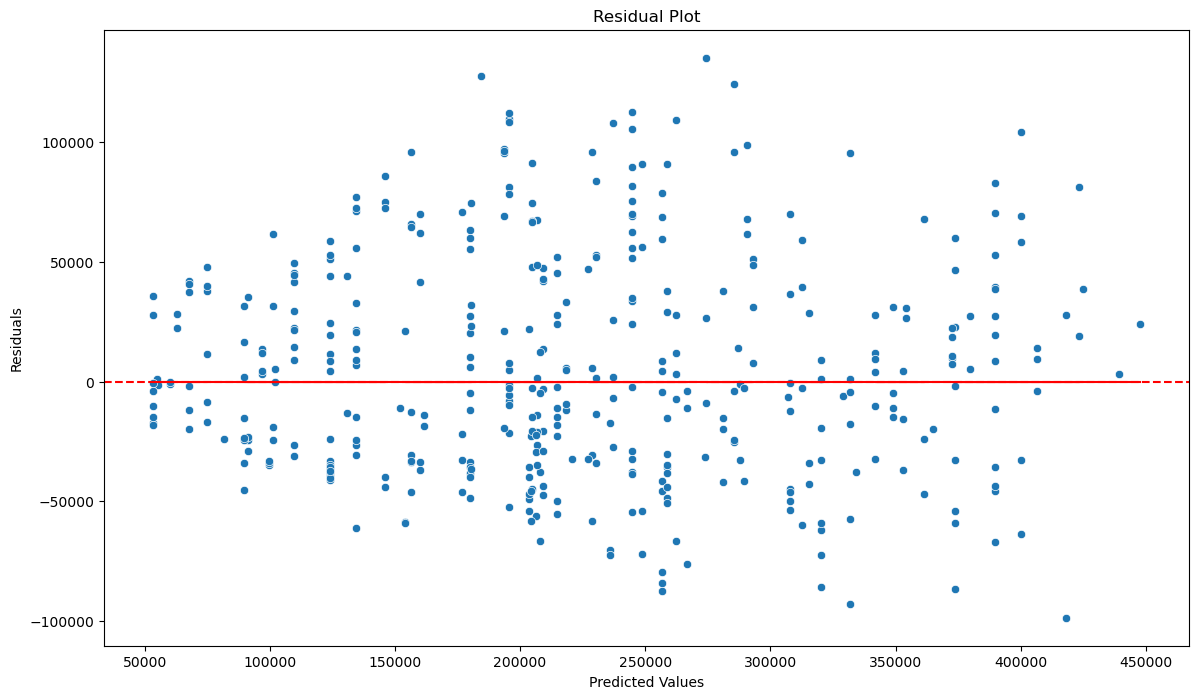

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and test_preds are defined as arrays or Series
y_residual = y_test - test_preds

plt.figure(figsize=(14, 8))
sns.scatterplot(x=test_preds, y=y_residual)  # Pass the actual data, not strings
sns.lineplot(x=test_preds, y=[0]*len(test_preds), color="r")  # Plot y=0 as a line
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color="red", linestyle="--")  # Optional: clearer line at y=0
plt.show()

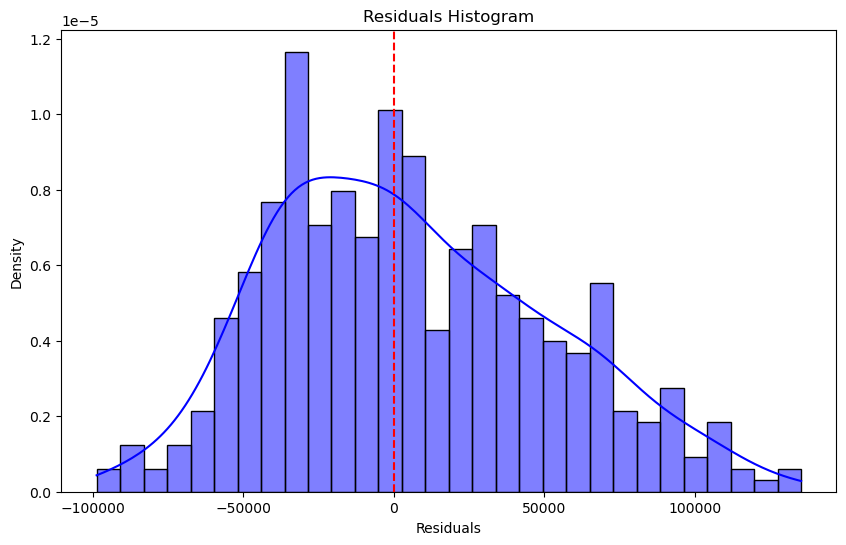

In [190]:
y_residual = y_test - test_preds

plt.figure(figsize=(10, 6))
sns.histplot(y_residual, kde=True, bins=30, color='blue', stat="density") 
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.axvline(0, color="red", linestyle="--")
plt.show()

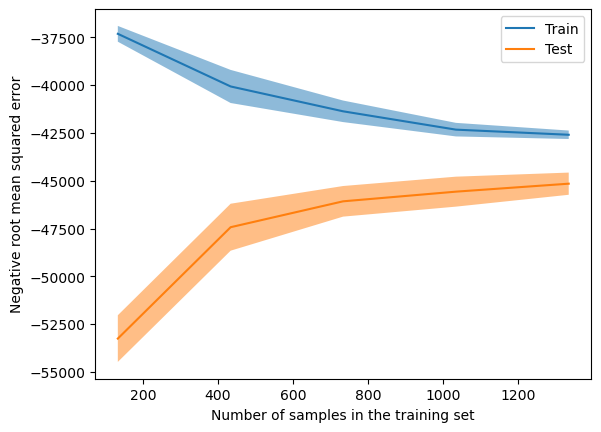

In [191]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(voting_regressor, X_train, y_train, scoring='neg_root_mean_squared_error')

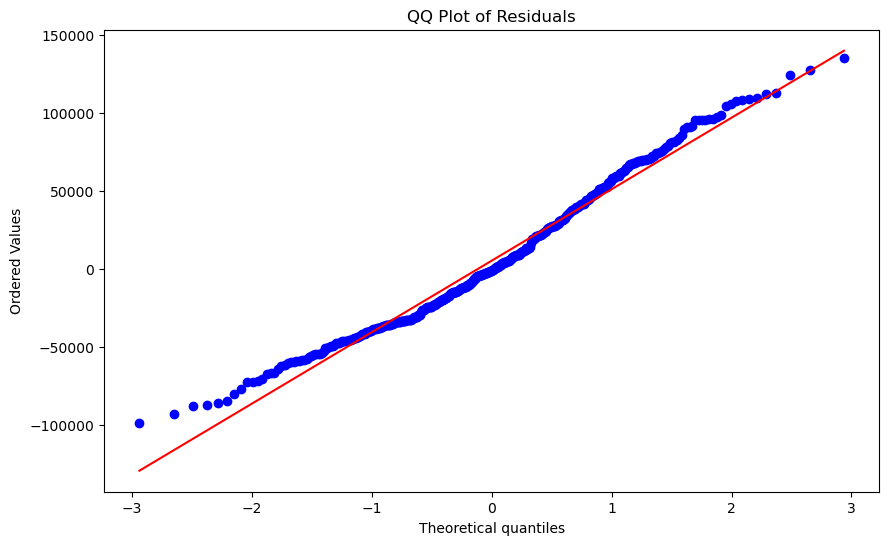

In [192]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(y_residual, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification

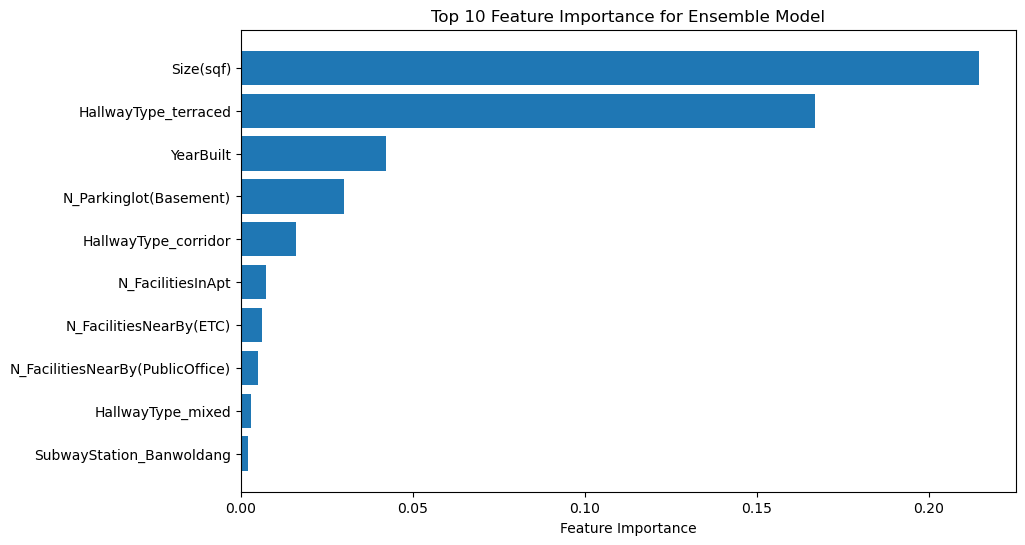

In [ ]:
rf_pipeline = voting_regressor.named_estimators_["RandomForest"]
rf_model = rf_pipeline.named_steps["modeling"].regressor_

xgb_pipeline = voting_regressor.named_estimators_["XGBoost"]
xgb_model = xgb_pipeline.named_steps["modeling"].regressor_

rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight') 
xgb_importance_array = np.array([xgb_importance.get(feature, 0) for feature in base_transformer.get_feature_names_out()])
combined_importance = (rf_importance + xgb_importance_array) / 2

features = base_transformer.get_feature_names_out()
sorted_idx = np.argsort(combined_importance)[::-1]
top_10_idx = sorted_idx[:10] 
top_10_features = features[top_10_idx]
top_10_importance = combined_importance[top_10_idx]

# Sort top 10 importance in ascending order
ascending_idx = np.argsort(top_10_importance)
top_10_features_ascending = top_10_features[ascending_idx]
top_10_importance_ascending = top_10_importance[ascending_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_10_features_ascending, top_10_importance_ascending)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance for Ensemble Model')
plt.show()

### Key Observations:

#### 1. **Dominance of `Size(sqf)`**
   - **Importance Score:** The feature `Size(sqf)` has the highest importance, significantly contributing to the model's predictive accuracy.  
   - **Interpretation:** The size of a property is the most critical determinant in the model, which aligns with expectations in real estate pricing or desirability models.

#### 2. **`HallwayType_terraced` as a Major Contributor**
   - **Importance Score:** The second-highest feature, indicating a strong positive effect on the model.  
   - **Interpretation:** Properties with a terraced hallway design are consistently favored, confirming their value in influencing the target variable (e.g., property price or desirability).

#### 3. **`YearBuilt` in Third Position**
   - **Importance Score:** Moderate contribution to the model's predictions.  
   - **Interpretation:** The year of construction plays a notable role, with newer buildings generally having higher desirability or value due to modern amenities or reduced maintenance requirements.

#### 4. **`N_Parkinglot(Basement)`**
   - **Importance Score:** Just below `YearBuilt`, basement parking availability is another significant contributor.  
   - **Interpretation:** Parking facilities are crucial in urban environments, influencing desirability and property value.

#### 5. **`HallwayType_corridor`**
   - **Importance Score:** Less important than the terraced hallway type but still relevant.  
   - **Interpretation:** While corridor-style hallways are impactful, they are less desirable than terraced designs, as indicated by their relative importance.

#### 6. **Lower-Impact Features**
   - **`N_FacilitiesInApt` and Nearby Facilities (`ETC` and `PublicOffice`):**
     - These features have minimal contributions but still add marginal value by providing additional contextual details about the property.
   - **`HallwayType_mixed`:**
     - As a combination of terraced and corridor styles, it has less impact than dedicated terraced or corridor types, suggesting that mixed designs do not strongly influence desirability.  
   - **`SubwayStation_Banwoldang`:**
     - Proximity to this specific subway station has the least importance among the top 10, likely because other location-based features (e.g., overall transit accessibility) are more broadly captured elsewhere.

### Insights and Applications:

1. **Feature Prioritization for Model Optimization:**
   - The top 2 features (`Size(sqf)` and `HallwayType_terraced`) dominate the predictions. If computational resources are constrained, focusing on these features could yield significant results.  
   - For real estate or urban planning, emphasizing these attributes could guide strategic pricing or development decisions.

2. **Secondary Features Add Context:**
   - Features like `YearBuilt`, `Parking`, and `Corridor Hallway` are valuable for refining predictions but are not as dominant as the top 2. They provide complementary insights for decision-making.

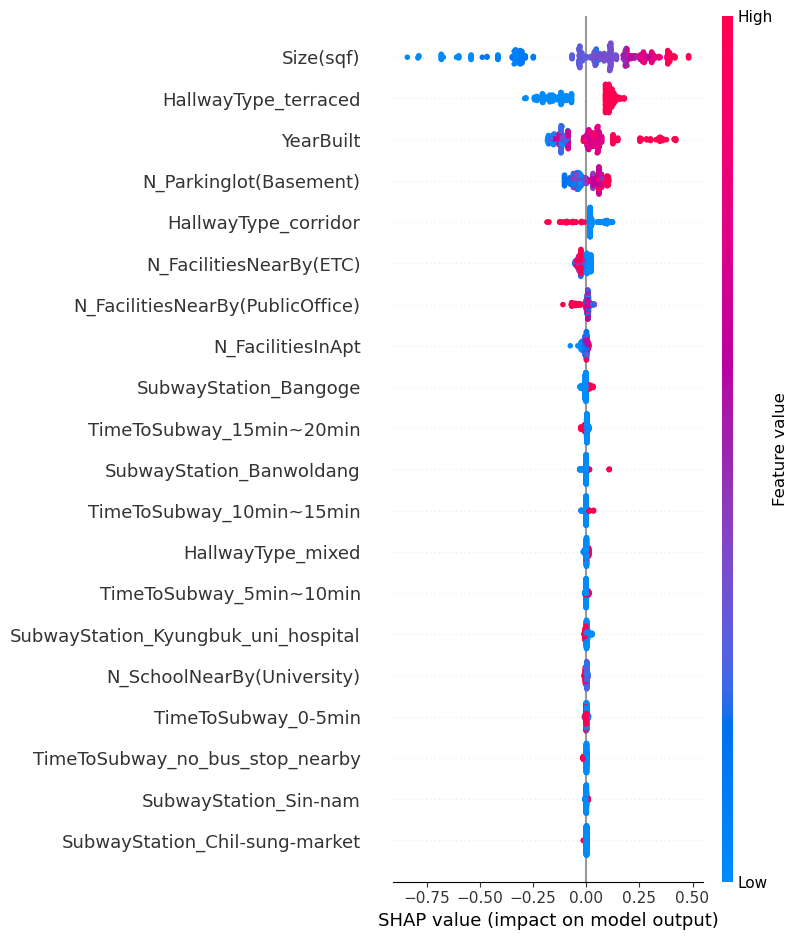

In [187]:
import shap


xgb_model = xgb_pipeline.named_steps['modeling'].regressor_
xgb_preprocessor = xgb_pipeline.named_steps['FeatureEngineering']

X_train_pre_xgb = xgb_preprocessor.transform(X_train)
X_test_pre_xgb = xgb_preprocessor.transform(X_test)

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_pre_xgb)

rf_pipeline = voting_regressor.named_estimators_["RandomForest"]
rf_model = rf_pipeline.named_steps["modeling"].regressor_
rf_preprocessor = rf_pipeline.named_steps["FeatureEngineering"]
X_test_pre_rf = rf_preprocessor.transform(X_test)


explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_pre_rf)


shap.summary_plot((shap_values_xgb + shap_values_rf) / 2, 
                  X_test_pre_rf, 
                  feature_names=rf_preprocessor.get_feature_names_out())

### Key Observations:
- **Size(sqf):**  
  - Larger size (red dots) generally increases the model output, shown by red dots clustered on the positive side.
  - Smaller size (blue dots) decreases the output.
- **HallwayType_terraced:**  
  - A terraced hallway type has a significant positive impact on the model's output.
- **YearBuilt:**  
  - Older buildings (low feature value, blue dots) tend to decrease the output, while newer buildings (red dots) have a positive effect.
- **N_Parkinglot(Basement):**  
  - A higher number of basement parking lots correlates with a positive impact on the output.
- **TimeToSubway (various ranges):**  
  - Closer proximity to the subway (e.g., 0–5 minutes) tends to have a positive impact, while farther distances (e.g., 15–20 minutes) have a negative impact.

### Insights:  
This plot provides a comprehensive view of feature importance and their effects. Features like **Size(sqf)** and **HallwayType_terraced** seem to dominate in influencing predictions, while proximity to subway stations and other variables also play significant roles.

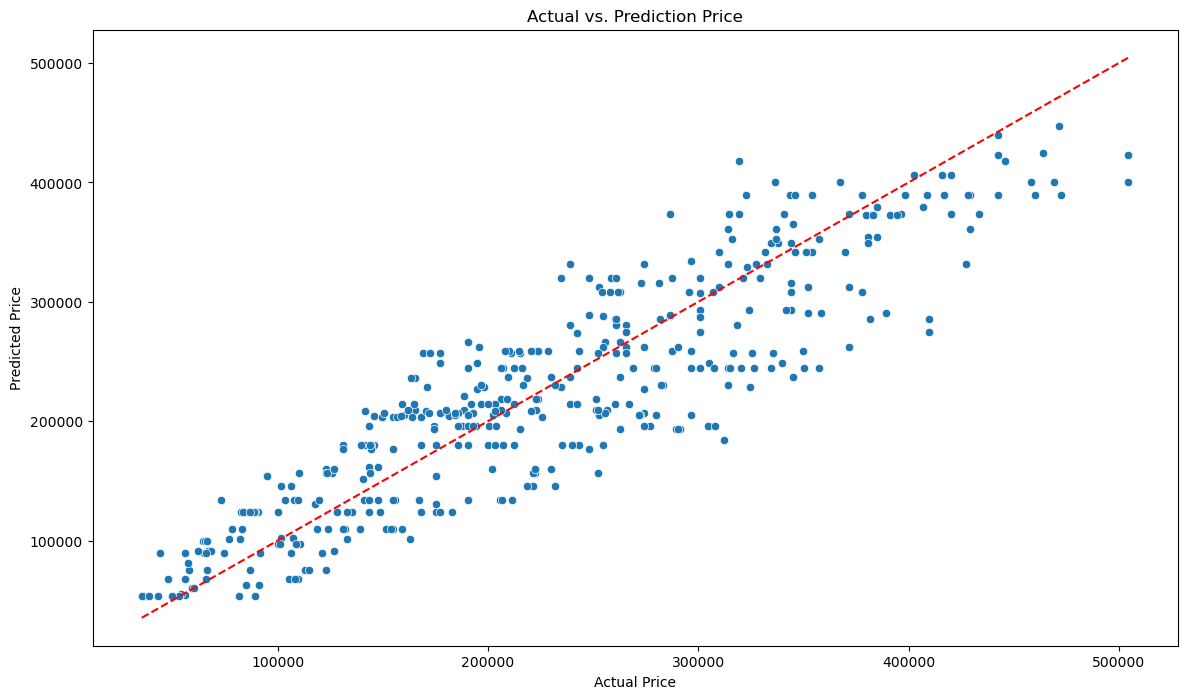

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Create scatter plot
sns.scatterplot(x=y_test, y=test_preds)

# Plot the line of perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set title and labels
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**

**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)